In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import tiktoken

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight


In [2]:
wikipedia = pd.read_csv('../../dataset.csv', index_col=0)

wikipedia

,id,url,title,text,category
416,26941,https://en.wikipedia.org/wiki/Spike%20Lee,Spike Lee,"Shelton Jackson ""Spike"" Lee (born March 20, 19...",actors
697,43337,https://en.wikipedia.org/wiki/Katharine%20Hepburn,Katharine Hepburn,"Katharine Houghton Hepburn (May 12, 1907 – Jun...",actors
1168,78127,https://en.wikipedia.org/wiki/James%20Doohan,James Doohan,"James Montgomery Doohan (; March 3, 1920 – Jul...",actors
1317,89695,https://en.wikipedia.org/wiki/William%20Christ...,William Christopher,"William Christopher (October 20, 1932 Decembe...",actors
1442,96406,https://en.wikipedia.org/wiki/Richard%20Greene,Richard Greene,Richard Marius Joseph Greene (25 August 1918 –...,actors
...,...,...,...,...,...
198385,68565885,https://en.wikipedia.org/wiki/1992%20Nigerian%...,1992 Nigerian Senate elections in Delta State,The 1992 Nigerian Senate election in Delta Sta...,events
199111,68862408,https://en.wikipedia.org/wiki/2022%20Valenzuel...,2022 Valenzuela local elections,Local elections will be held in Valenzuela on ...,events
199302,68973980,https://en.wikipedia.org/wiki/Sara%20Bay%20Cla...,Sara Bay Classic,The Sara Bay Classic was a tournament on the S...,events
200401,69486421,https://en.wikipedia.org/wiki/List%20of%20eart...,List of earthquakes in Malaysia,This is a list of earthquakes in Malaysia:\n\n...,events


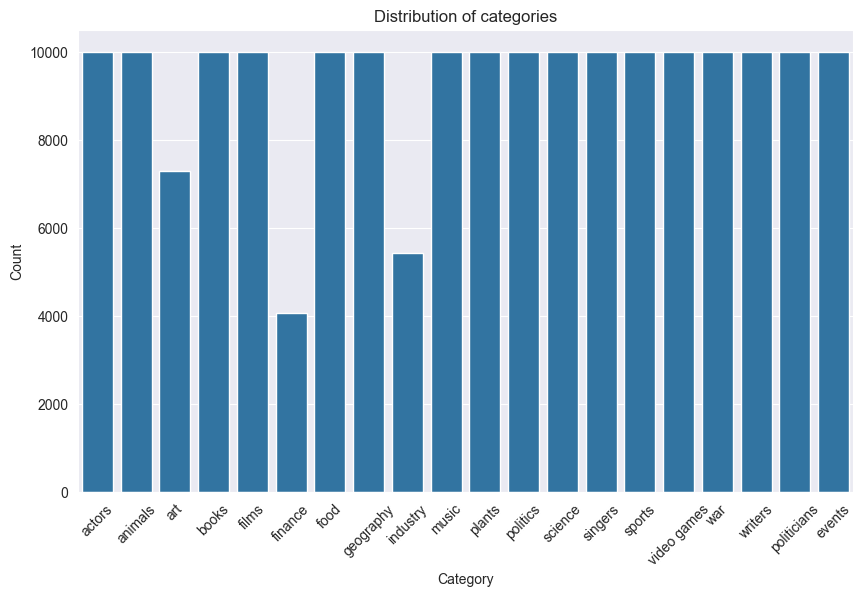

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=wikipedia)

plt.title('Distribution of categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

In [4]:
wiki = wikipedia.sample(frac=1)

wiki_X = wiki['text']
wiki_y = wiki['category']

X_train, X_test, y_train, y_test = train_test_split(wiki_X, wiki_y, test_size=0.2, random_state=42)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [5]:
model = make_pipeline(CountVectorizer(ngram_range = (1,1)), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Features dimension: {len(X_train), len(model[0].vocabulary_)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Features dimension: (149439, 1025933)
Classification Report:
               precision    recall  f1-score   support

      actors       0.78      0.86      0.82      2043
     animals       0.96      0.87      0.92      1963
         art       0.94      0.92      0.93      1463
       books       0.84      0.76      0.80      2065
      events       0.83      0.40      0.54      1989
       films       0.85      0.98      0.91      1967
     finance       0.83      0.38      0.53       816
        food       0.92      0.52      0.66      1991
   geography       0.71      0.86      0.78      2014
    industry       0.63      0.49      0.56      1032
       music       0.95      0.91      0.93      2040
      plants       0.98      0.95      0.96      1972
 politicians       0.65      0.82      0.73      2025
    politics       0.53      0.75      0.62      1957
     science       0.83      0.88      0.86      2052
     singers       0.74      0.94      0.82      1967
      sports       

Plot Confusion Matrix

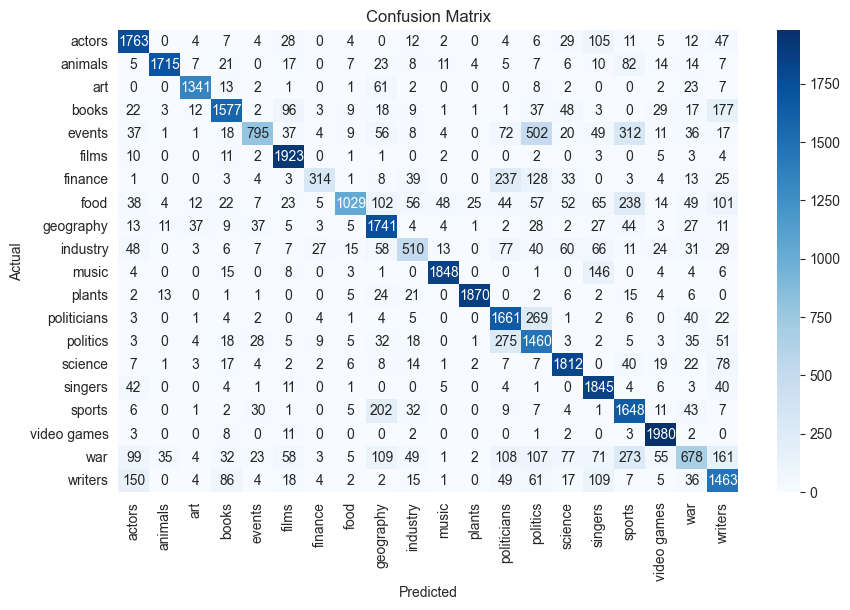

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
test_string = X_test.iloc[20][len(X_test.iloc[20])//2:]

In [8]:
print("With text in half:", model.predict([test_string]))
print("With full text:", model.predict([X_test.iloc[20]]))

With text in half: ['sports']
With full text: ['sports']


In [9]:
X_test.iloc[20]

"Henry Callahan (1957–1982) was a player and ambassador of Ultimate and helped bring the sport to the University of Oregon, formally establishing a team in 1978. In 1982, he was murdered during a robbery while working in Boulder, Colorado. Both the Callahan Award, given each year to the best male and female college Ultimate players and the Callahan Rules of Ultimate are named after him. The idea and the award were founded by Charles Kerr, a long-time coach. \n\nThere is also a move in Ultimate named after Callahan called a Callahan.  A Callahan is when a defensive player intercepts the disc in the opponent's end zone for a point.  It is a rare occurrence, because it requires a defender to intercept, rather than simply block, a pass in the offense's own end zone. Under normal circumstances, the offense does not start a possession within their own end zone, so opportunities for a Callahan are limited to situations where the offense has been forced into their own end zone (either by a goo

In [10]:
y_test.iloc[20]

'sports'

In [11]:
from collections import Counter

count_c = Counter(y_train)

priors = {k:v/len(y_train) for k, v in count_c.items()}
print(priors)

train_strings = " ".join(X_train)
train_tokens = word_tokenize(train_strings)
vocabulary = set(train_tokens)
V = len(vocabulary)
classes = set(y_train)

{'actors': 0.05324580598103574, 'politics': 0.05382129163069881, 'politicians': 0.053366256465848944, 'sports': 0.05347332356346068, 'music': 0.05326588106183794, 'books': 0.053098588721819606, 'food': 0.053593774048273875, 'films': 0.05375437469469148, 'finance': 0.021794846057588715, 'industry': 0.029463526924029204, 'war': 0.05386813348590395, 'singers': 0.05375437469469148, 'geography': 0.053439865095457006, 'plants': 0.053720916226687815, 'art': 0.03899919030507431, 'science': 0.05318558073862914, 'writers': 0.05331272291704307, 'events': 0.053607157435475346, 'video games': 0.05345324848265848, 'animals': 0.053781141469094414}


In [12]:
train_df = pd.DataFrame(zip(X_train, y_train), columns = ["text", "category"])
train_df.head()

,text,category
0,"John McTernan is an Australian actor, known fo...",actors
1,"A Teachta Dála ( , ; plural ), abbreviated as...",politics
2,Helge Solvang (3 June 1913 – 26 September 2013...,politicians
3,Catherine Malloy Hollern (born 12 April 1955) ...,politics
4,The Nevsky Express () (No. 167B/168B) is a Rus...,sports


In [13]:
mega_dict = dict()
prob_dict = dict()
k = 1

for c in classes:
    class_df = train_df.query(f"category == '{c}'")
    mega_document = class_df["text"]
    mega_strings = " ".join(mega_document)
    mega_tokens = word_tokenize(mega_strings)
    mega_count = Counter(mega_tokens)
    mega_dict[c] = mega_count
    prob_dict[c] = dict()


    for token in vocabulary:
        prob_dict[c][token] = (mega_dict[c][token] + k ) / (len(mega_tokens) + V)

print(mega_dict["sports"]["i"])
print(prob_dict["sports"]["i"])

38
6.990517631698664e-06


In [14]:
import math

test_tokens = word_tokenize("is an American")

pred_dict = dict()

for c in classes:
    sum = math.log2(priors[c])
    for token in test_tokens:
        #print(prob_dict[c][token])
        sum += math.log2(prob_dict[c][token])
    sum = math.pow(2, sum)
    pred_dict[c] = sum
print(pred_dict)
print(max(pred_dict, key=pred_dict.get))

{'singers': 6.254852205977884e-10, 'films': 4.513441369061651e-09, 'finance': 7.365820752704034e-11, 'actors': 9.339982058994589e-10, 'geography': 5.367982007737854e-10, 'food': 4.942039758983238e-10, 'politics': 3.656602197891295e-10, 'science': 2.168092733304404e-09, 'plants': 2.5213496685655144e-10, 'animals': 3.70978701203644e-10, 'books': 1.2735300173872207e-09, 'writers': 9.070553385668994e-10, 'politicians': 3.0824224465513314e-10, 'events': 2.862728085020484e-10, 'war': 3.8583778391154916e-10, 'industry': 3.022793258694813e-10, 'art': 2.6310015739818837e-10, 'video games': 3.4591716615352975e-10, 'music': 2.197084816301299e-10, 'sports': 2.3596081668728605e-10}
films


In [15]:
import math

test_tokens = [word_tokenize(text) for text in X_test]

pred_dict = dict()
preds = list()

for report_tokens in test_tokens:
    for c in classes:
        sum = math.log2(priors[c])
        for token in report_tokens:
            if token in prob_dict[c]: # remove unknown tokens
                sum += math.log2(prob_dict[c][token])
        sum = math.pow(2, sum)
        pred_dict[c] = sum
    preds.append(max(pred_dict, key=pred_dict.get))

In [16]:
from sklearn.metrics import classification_report

print(classification_report(preds, list(y_test)))

              precision    recall  f1-score   support

      actors       0.07      0.80      0.13       178
     animals       0.48      0.98      0.64       961
         art       0.14      0.98      0.24       203
       books       0.06      0.97      0.11       124
      events       0.07      0.93      0.13       150
       films       0.06      0.90      0.11       125
     finance       0.02      0.89      0.04        19
        food       0.14      0.96      0.25       294
   geography       0.16      0.78      0.26       409
    industry       0.02      0.81      0.05        31
       music       0.10      0.96      0.19       218
      plants       0.38      0.99      0.55       745
 politicians       0.19      0.81      0.30       466
    politics       0.08      0.66      0.14       241
     science       0.09      0.85      0.16       218
     singers       1.00      0.06      0.12     32091
      sports       0.21      0.62      0.32       690
 video games       0.03    